# Shadow denoising

In [1]:
# importing necessary libraries
import numpy as np
import imageio
import matplotlib.pyplot as plt
import matplotlib as mpl

Text(0.5, 1.0, 'B')

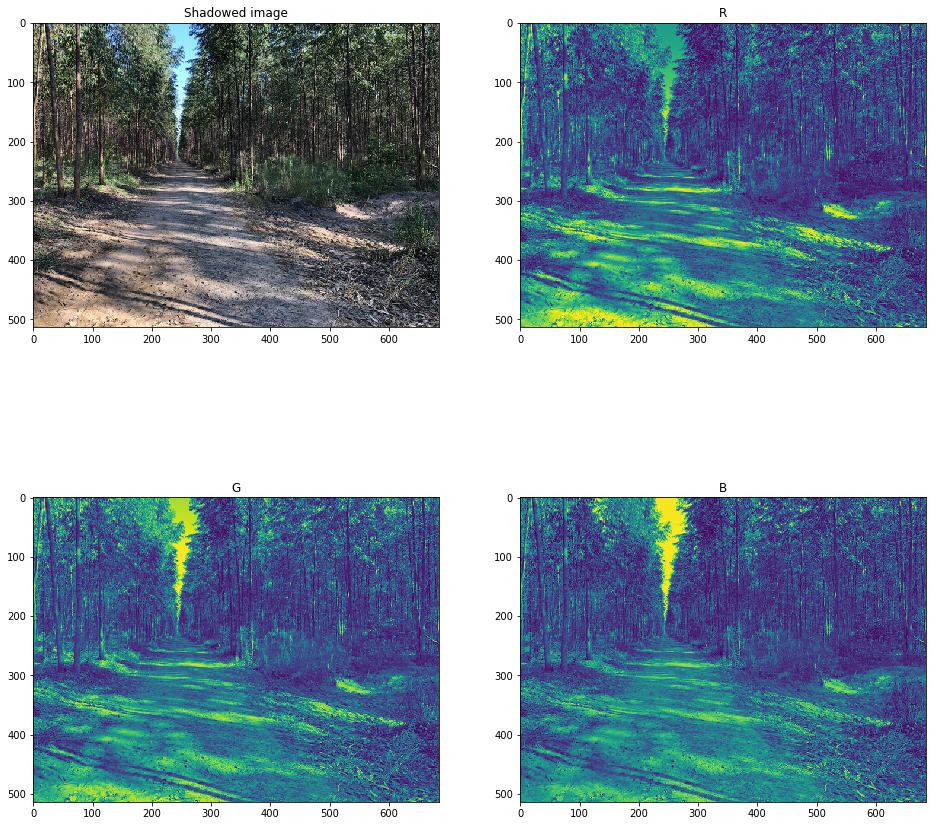

In [17]:
I = imageio.imread("../images/shadowE.jpg")
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(I)
plt.title("Shadowed image")
plt.subplot(222)
plt.imshow(I[:,:,0])
plt.title("R")
plt.subplot(223)
plt.imshow(I[:,:,1])
plt.title("G")
plt.subplot(224)
plt.imshow(I[:,:,2])
plt.title("B")

In [18]:
def range_adjustment(img, minvalue=0, maxvalue=255):
    currmin = np.min(img)
    currmax = np.max(img)
    
    img_u8 = np.zeros(img.shape, dtype=np.uint8)
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            img_u8[x,y] = ((img[x,y]-currmin)*(maxvalue - minvalue)//(currmax - currmin)) + minvalue
    
    return img_u8    

Text(0.5, 1.0, 'V')

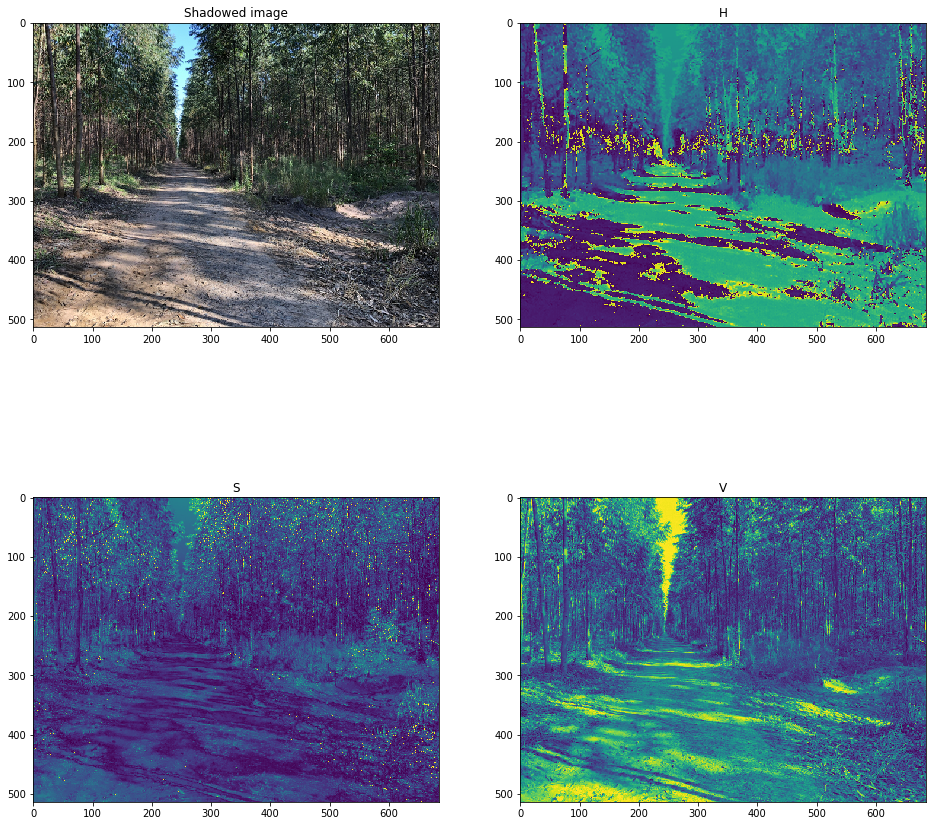

In [19]:
I_hsv = mpl.colors.rgb_to_hsv(I)
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(I)
plt.title("Shadowed image")
plt.subplot(222)
plt.imshow(range_adjustment(I_hsv[:,:,0],0,255))
plt.title("H")
plt.subplot(223)
plt.imshow(range_adjustment(I_hsv[:,:,1],0,255))
plt.title("S")
plt.subplot(224)
plt.imshow(range_adjustment(I_hsv[:,:,2],0,255))
plt.title("V")

In [22]:
def limiarization(img, thr = 0.5):
    threshold = thr * np.max(img)
    mask = np.zeros(img.shape, dtype = np.uint8)
    mask[np.where(img < threshold)] = 1
    return mask

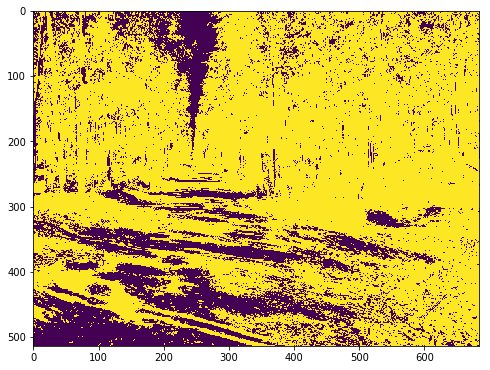

In [30]:
shadow_mask = limiarization(I_hsv[:,:,2],0.5)
plt.figure(figsize=(8,8))
plt.imshow(shadow_mask)

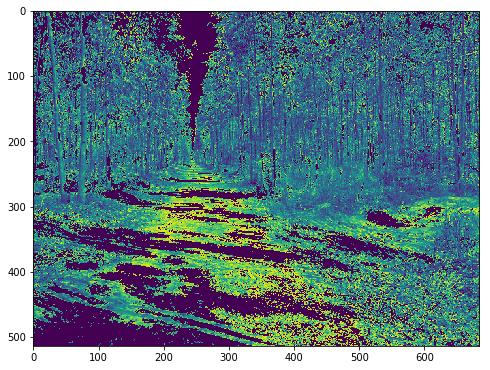

In [39]:
plt.figure(figsize=(8,8))
plt.imshow(shadow_mask*I[:,:,2])